In [1]:
import sys
sys.path.append('../src')

import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from gait.utils import load_file

In [3]:
def get_log_file(prefix , label):
    return prefix + '/' + 'log_{}_overlap/classification_report.csv'.format(label)

def get_classification_report_experiment(experiment_name):
    overlap_percents = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
    classification_report = []
    log_dir_path = '../experiment_notebook/{}/logs'.format(experiment_name)
    log_files = list(map(lambda label: get_log_file(log_dir_path, label), overlap_percents))
    for index, logFile in enumerate(log_files):
        value = load_file(logFile)
        classification_report.append(value)

    # print(classification_report[90]
    classification_report = np.array(classification_report)
    return classification_report

def get_plot_values_classification_report(classification_report):
    classification_report = np.array(classification_report)
    precision = classification_report[:,:,1]
    recall = classification_report[:,:,2]
    f1_score = classification_report[:,:,3]
    f1 = {}
    re = {}
    pre = {}
    for i in range(5):
        f1[i] = np.array(f1_score[:,i+1], dtype=float)
        re[i] = np.array(recall[:,i+1], dtype=float)
        pre[i] = np.array(precision[:,i+1], dtype=float)
    return f1, re, pre

In [4]:
overlap_percents = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['No motion', 'Normal Gait', 'Waddling Gait',
          'Propulsive Gait', 'Spastic Gait']

markers = ['o', 'v', '^', '<', '>']
linestyles= ['solid', 'dashed', 'dashdot', 'dotted', 'solid']

def plot_values_classification_report(precision_values, recall_values, f1_values):
    figure, (ax1, ax2, ax3) = plt.subplots(1, 3)
    figure.set_figheight(3)
    figure.set_figwidth(14)
    figure.set_dpi(300)
    figure.tight_layout(pad=2.0)
    
    
    def plotValues(mapValues, ax, title, ylabel):
        index = 0
        for classKey in mapValues:
            label = labels[index]
            marker = markers[index]
            linestyle=linestyles[index]
            vals = mapValues[classKey]
            ax.plot(overlap_percents, vals, label=label, marker=marker, ls=linestyle)
            index += 1
        ax.grid(linestyle='--', linewidth=0.25)
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        ax.set_xlabel("Overlap percentage")
        ax.set_ylim(0, 1)
        ax.legend(loc=4, prop={'size': 10})
    
    
    plotValues(precision_values, ax1, title="Precision vs data overlap %", ylabel="Precision")
    plotValues(recall_values, ax2, title="Recall vs data overlap %", ylabel="Recall")
    plotValues(f1_values, ax3, title="F1-values vs data overlap %", ylabel="F1-values")
    
    plt.show()


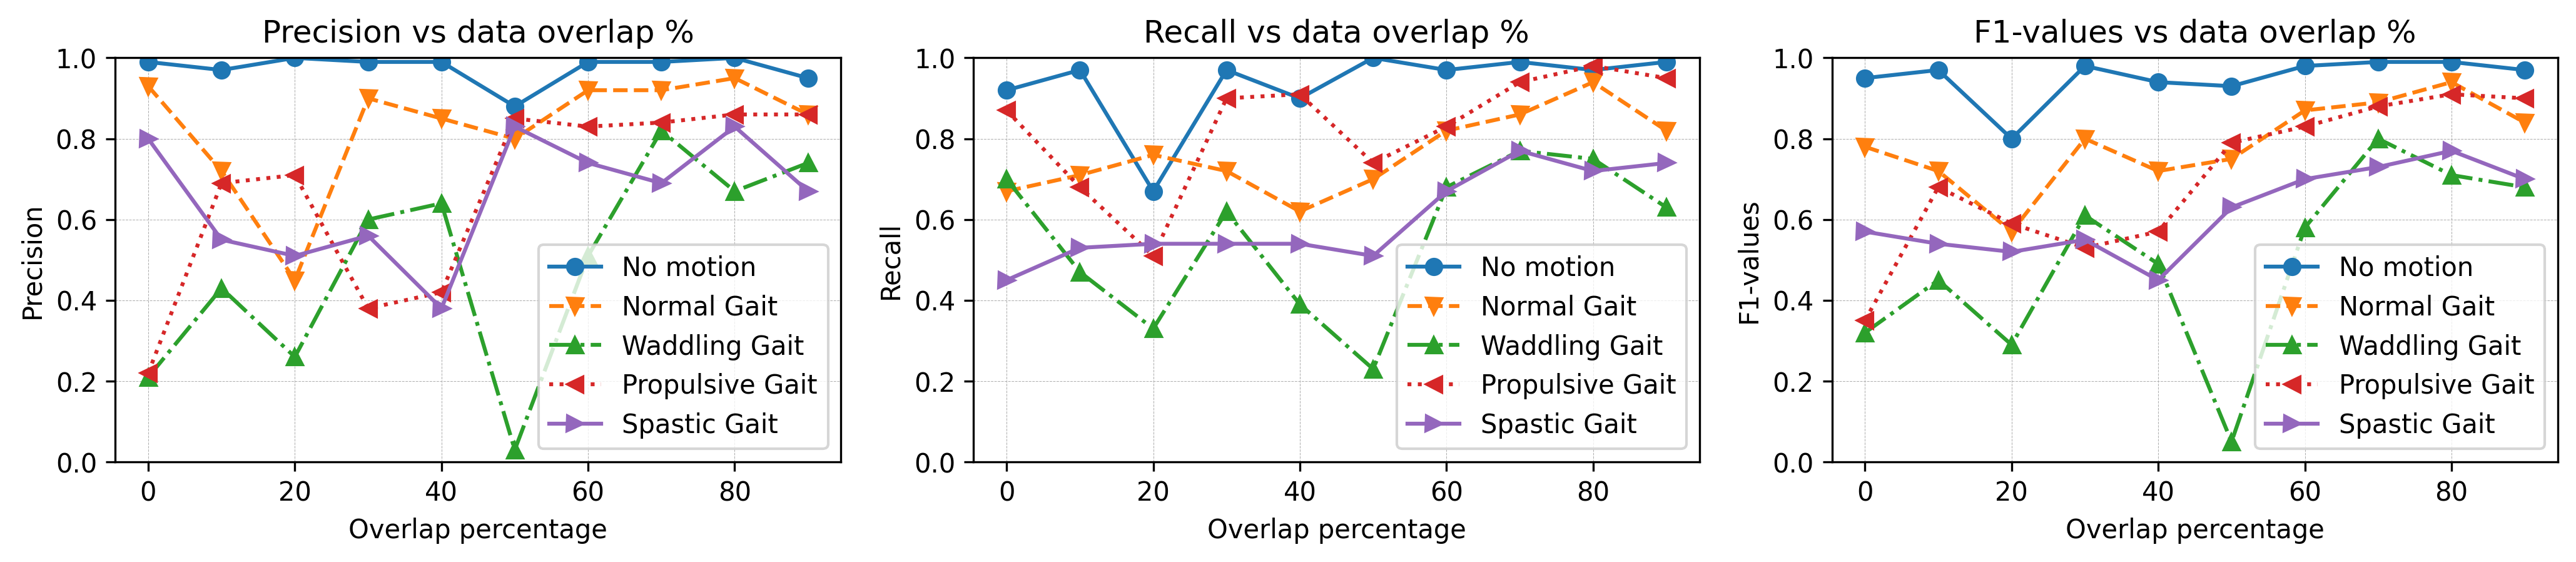

In [5]:
EXPERIMENT_FOLDER_NAME = 'cnn-network-results'
classification_report = get_classification_report_experiment(EXPERIMENT_FOLDER_NAME)
f1_values, recall_values, precision_values = get_plot_values_classification_report(classification_report)
plot_values_classification_report(precision_values, recall_values, f1_values)

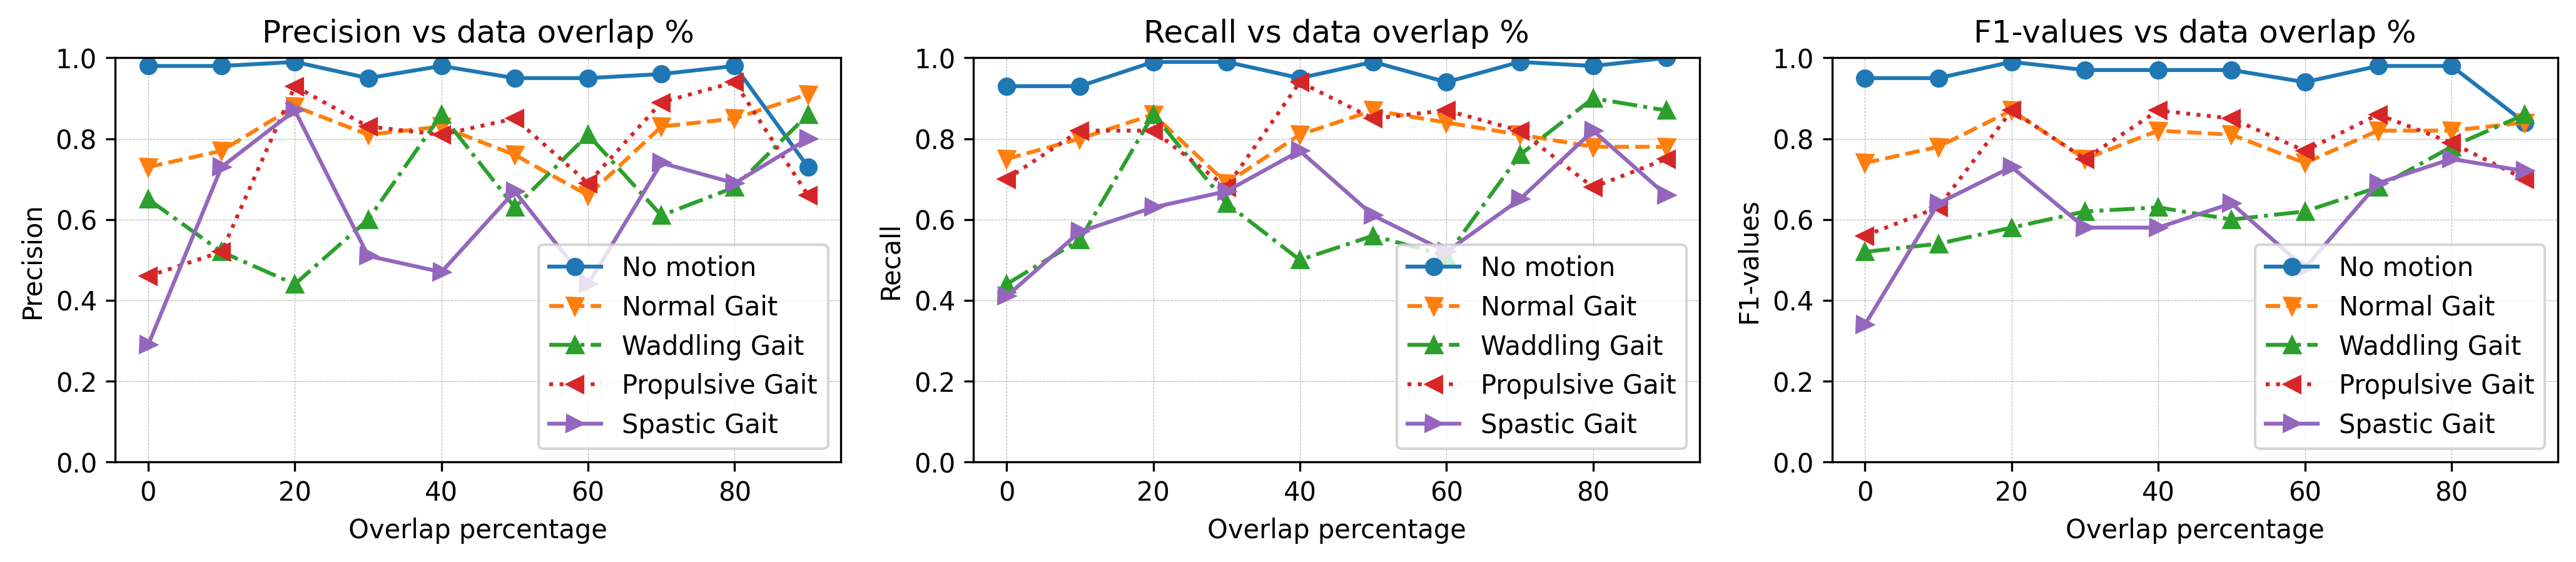

In [6]:
EXPERIMENT_FOLDER_NAME = 'cnn-stat-network-results'
classification_report = get_classification_report_experiment(EXPERIMENT_FOLDER_NAME)
f1_values, recall_values, precision_values = get_plot_values_classification_report(classification_report)
plot_values_classification_report(precision_values, recall_values, f1_values)

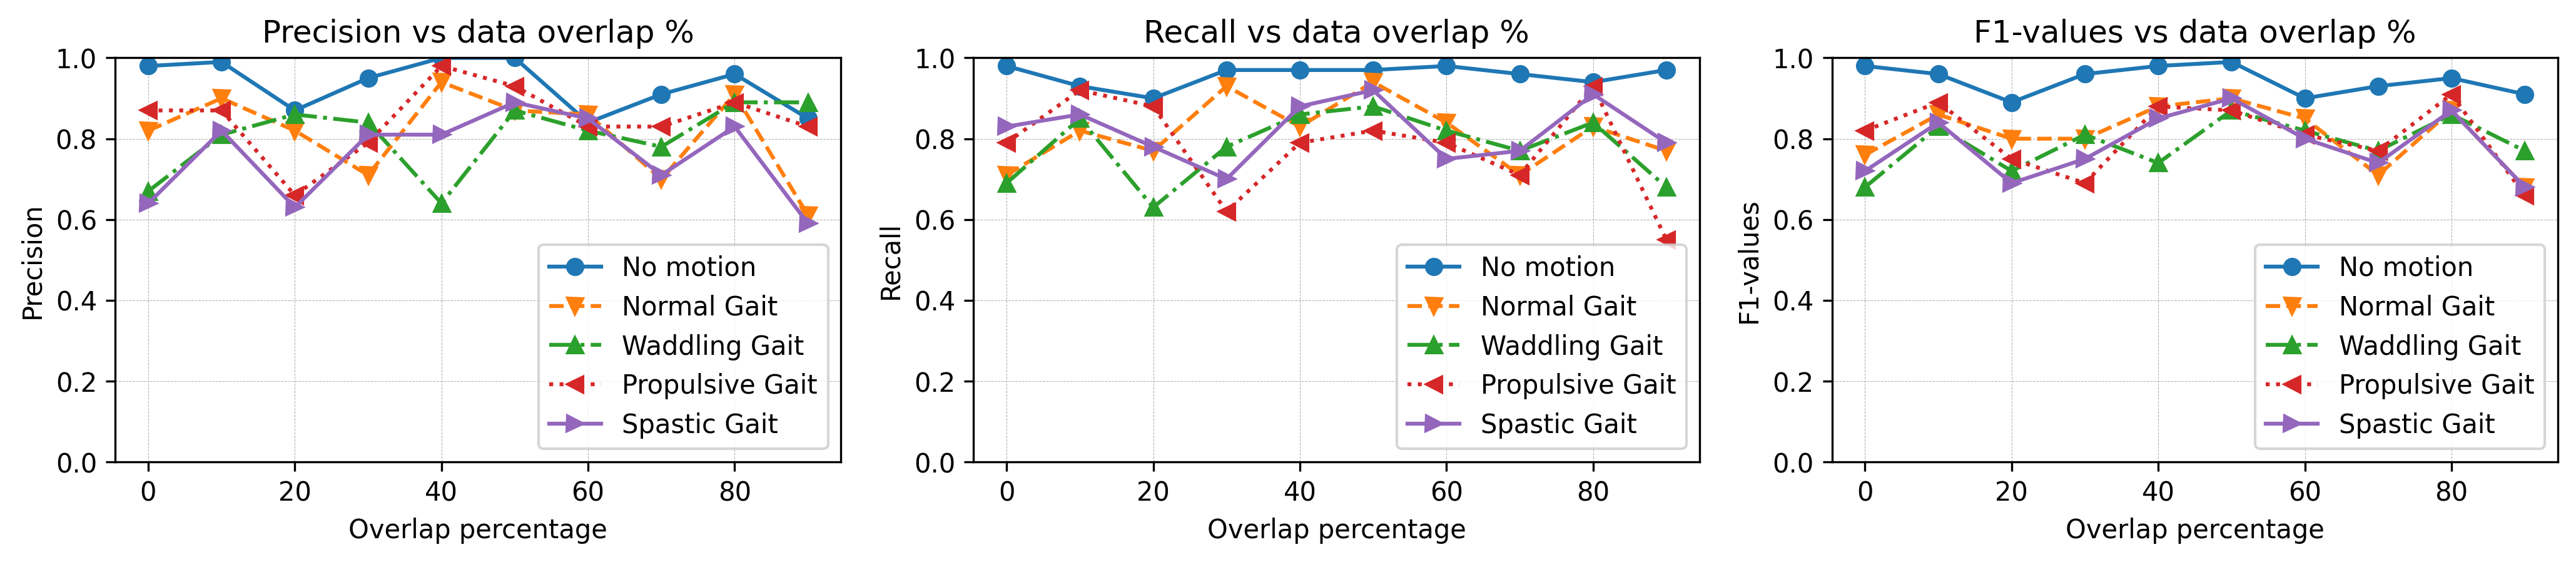

In [7]:
EXPERIMENT_FOLDER_NAME = 'cnn-lstm-network-results'
classification_report = get_classification_report_experiment(EXPERIMENT_FOLDER_NAME)
f1_values, recall_values, precision_values = get_plot_values_classification_report(classification_report)
plot_values_classification_report(precision_values, recall_values, f1_values)

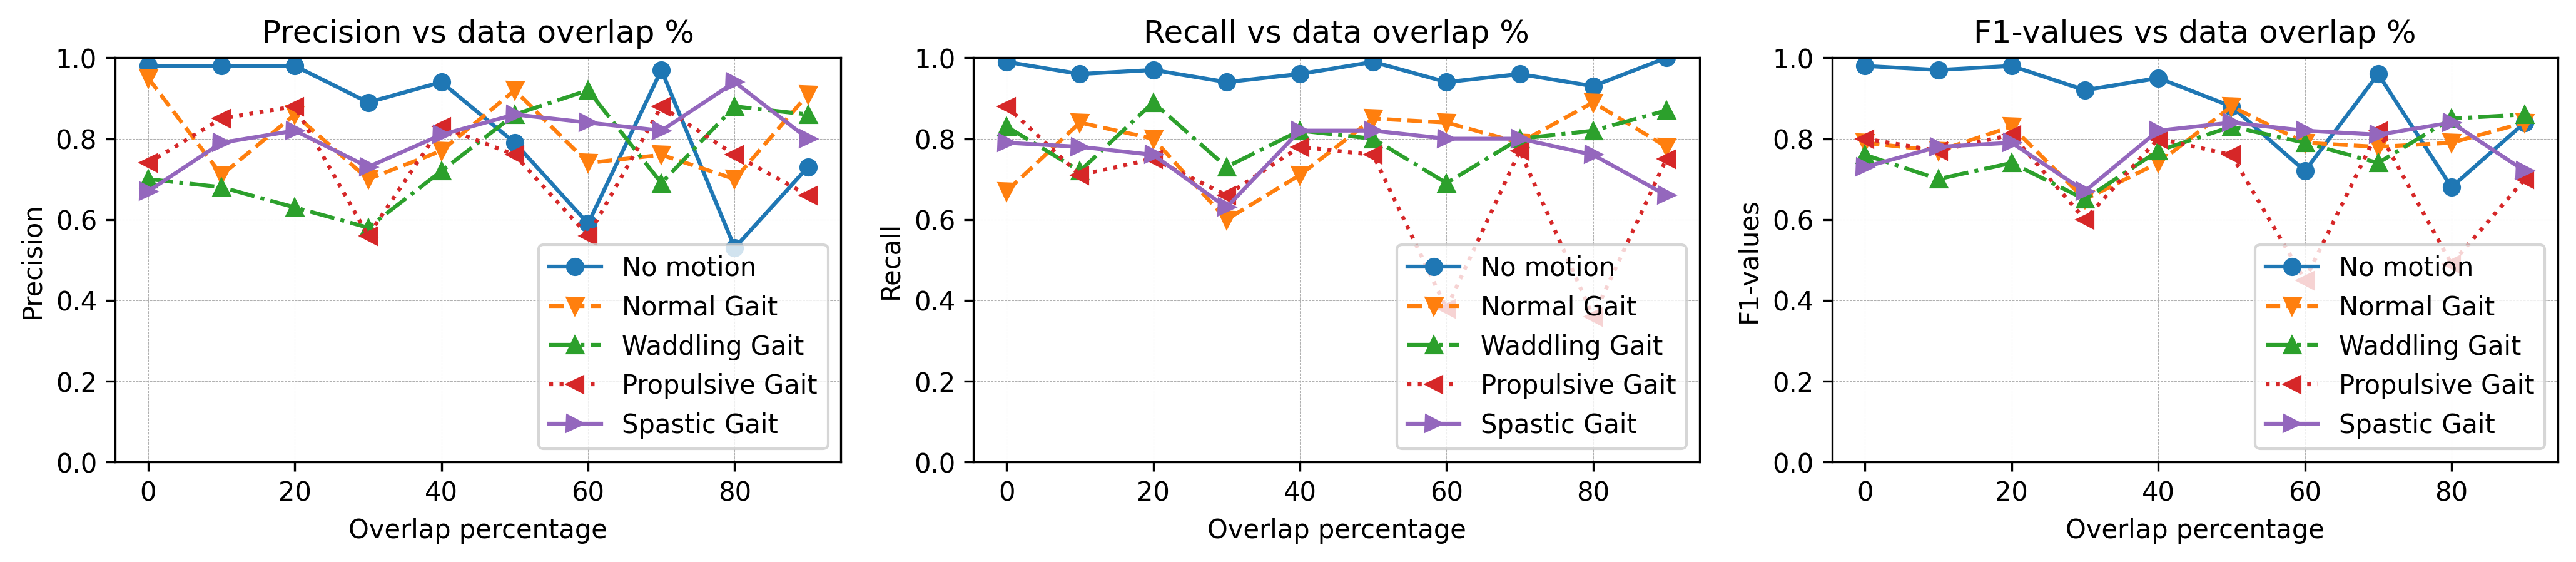

In [8]:
EXPERIMENT_FOLDER_NAME = 'cnn-bilstm-network-results'
classification_report = get_classification_report_experiment(EXPERIMENT_FOLDER_NAME)
f1_values, recall_values, precision_values = get_plot_values_classification_report(classification_report)
plot_values_classification_report(precision_values, recall_values, f1_values)

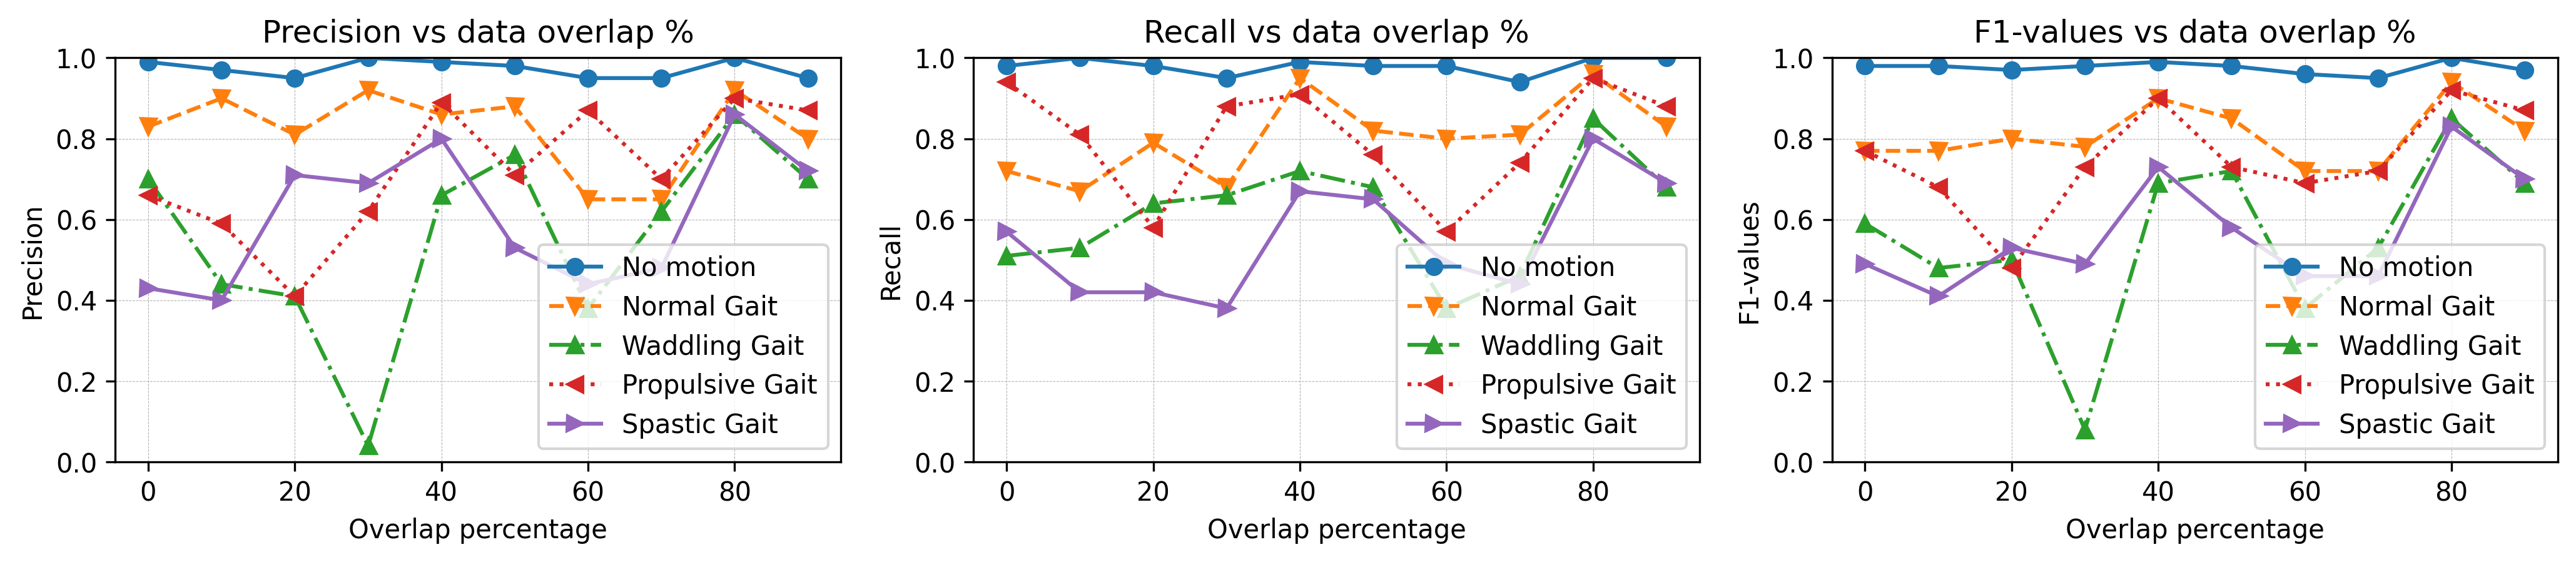

In [9]:
EXPERIMENT_FOLDER_NAME = 'cnn-network-retrain-results'
classification_report = get_classification_report_experiment(EXPERIMENT_FOLDER_NAME)
f1_values, recall_values, precision_values = get_plot_values_classification_report(classification_report)
plot_values_classification_report(precision_values, recall_values, f1_values)